In [2]:
import os

curr_folder = os.getcwd() + "/"
datasets_folder = curr_folder[:-6] + "Datasets/"
stats_results_folder = curr_folder + "Results/"
print(datasets_folder)
print(stats_results_folder)

/home/ipsilva/Repositories/dynamic-projections/Datasets/
/home/ipsilva/Repositories/dynamic-projections/Stats/Results/


In [3]:
datasets_subfolders = []
for i in os.walk(datasets_folder):
    datasets_subfolders.append(i[0])

datasets_subfolders = datasets_subfolders[1:]
datasets_subfolders

['/home/ipsilva/Repositories/dynamic-projections/Datasets/gaussians',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/quickdraw',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/sorts',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/walk',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/nnset',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/fashion',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/cifar10cnn',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/esc50',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/qtables',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/cartolastd']

In [4]:
dataset_number = 2
selected_dataset = datasets_subfolders[dataset_number]
selected_dataset

'/home/ipsilva/Repositories/dynamic-projections/Datasets/sorts'

In [5]:
from os import listdir
from os.path import isfile, join

files = [f for f in listdir(selected_dataset) if isfile(join(selected_dataset, f))]
files[:5]

['sorts-72.csv',
 'sorts-90.csv',
 'sorts-97.csv',
 'sorts-79.csv',
 'sorts-58.csv']

In [6]:
from sklearn.preprocessing import MinMaxScaler
from itertools import product
import pandas as pd
import numpy as np

df = pd.DataFrame()

obs_per_timestep = []
for file in files:
    file_loc = selected_dataset + "/" + file
    ndf = pd.read_csv(file_loc)
    df = df.append(ndf)
    obs_per_timestep.append(ndf.shape[0])
    
median_obs_per_timestep = np.median(obs_per_timestep)
dev_obs_per_timestep = np.std(obs_per_timestep)

min_max_scaler = MinMaxScaler()
df = pd.DataFrame(min_max_scaler.fit_transform(df.drop(columns=df.columns[0], axis=1)))
print(df.shape, df.head())

(7840, 100)     0         1         2         3         4         5         6         7   \
0  0.0  0.011905  0.019841  0.031746  0.039683  0.051587  0.059524  0.071429   
1  0.0  0.011905  0.019841  0.031746  0.039683  0.051587  0.059524  0.071429   
2  0.0  0.011905  0.019841  0.031746  0.039683  0.051587  0.059524  0.071429   
3  0.0  0.011905  0.019841  0.031746  0.039683  0.051587  0.059524  0.071429   
4  0.0  0.011905  0.019841  0.031746  0.039683  0.051587  0.059524  0.071429   

         8        9   ...        90        91        92        93        94  \
0  0.079365  0.09127  ...  0.638889  0.622490  0.619048  0.940476  0.602410   
1  0.079365  0.09127  ...  0.646825  0.634538  0.619048  0.821429  0.706827   
2  0.079365  0.09127  ...  0.920635  0.674699  0.666667  0.658730  0.899598   
3  0.079365  0.09127  ...  0.809524  0.746988  0.607143  0.932540  0.590361   
4  0.079365  0.09127  ...  0.678571  0.839357  0.666667  0.658730  0.642570   

         95        96        97 

In [7]:
from sklearn.decomposition import PCA

def intrisic_dim(dataframe, target_variance):
    pca = PCA()

    principalComponents = pca.fit_transform(df)

    list_variance = pca.explained_variance_ratio_

    final_var = 0
    dims = 0
    for var in list_variance:
        final_var += var
        dims += 1
        if final_var > target_variance:
            break
    return dims, final_var, principalComponents[:dims]

In [8]:
target_variance = 0.9

(dims, final_var, components) = intrisic_dim(df, target_variance)

print("Total time-steps:", len(obs_per_timestep))
print("Registers per time-step (median):", median_obs_per_timestep)
print("Registers per time-step (deviation):", dev_obs_per_timestep)
print("Total dimensions:", df.shape[1])
print("Intrinsic dimensions:", dims)
print("Total variance:", final_var)

Total time-steps: 98
Registers per time-step (median): 80.0
Registers per time-step (deviation): 0.0
Total dimensions: 100
Intrinsic dimensions: 61
Total variance: 0.9012828269684908


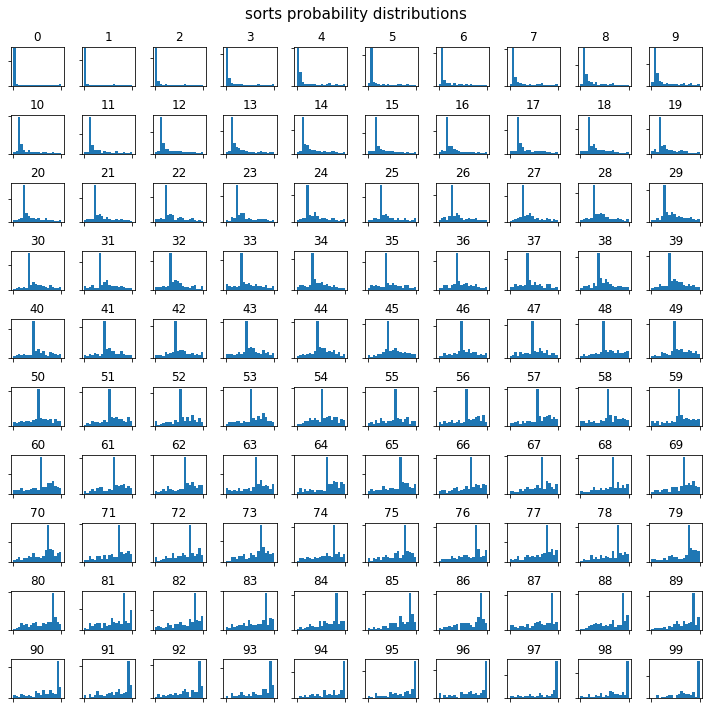

In [9]:
import matplotlib.pyplot as plt

# identifying distributions
hists_ax = df.hist(bins=20, grid=False, figsize=(10,10), density=True)

for arr in hists_ax:
    for ax in arr:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
fig_name = selected_dataset.split('/')[-1]
plt.suptitle(fig_name + " probability distributions", fontsize=15, weight='roman')
plt.tight_layout()
plt.subplots_adjust(top=0.925)
plt.savefig(stats_results_folder+"attribute_histograms/"+fig_name+"_prob_dist")